# จำแนกพันธุ์ปลาสวยงาม

In [1]:
import gradio as gr ##gradio เป็น ไลบรารี่สำหรับใช้ในการแสดงล output จากโปรแกรมที่เขียน โดยสร้าง adress ขึ้นมาเพื่อช่วยในการแสดงผลแบบเว็บไซต์

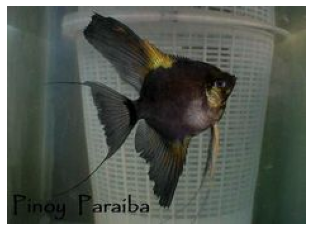

In [2]:
import numpy as np
import matplotlib.pyplot as plt ##ไลบรารี่สำหรับการ plt กราฟ หรือแสดงรูปภาพ
import os
import cv2 ##ไลบรารี่สำหรับการจัดการกับรูปภาพ
import tensorflow as tf ##ไลบรารีสำหรับใช้พัฒนา machine learning

from tensorflow import keras ##เป็น Library ที่ Open-source สำหรับสร้าง Neural Network ที่ใช้ทำ Deep learning
from tensorflow.keras import layers ##บอกมิติของ input
from tensorflow.keras.models import Sequential

DATADIR ="D:/Dataset/fish_type" ##การประกาศตัวแปร DATADIR เพื่อเก็บข้อมูลที่เรียกใช้ข้อมูลมาจากคอมพิวเตอร์ของเรา
CATEGORIES = ["angel fish","betta_fish","dragon_fish","gold_fish","guppy_fish"] ##กำหนดชื่อไฟล์ข้อมูลที่เราจะเรียกใช้มาจาก dataset ไปไว้ในตัวแปร CATEGORIES

for catagory in CATEGORIES:
    path = os.path.join(DATADIR,catagory)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) ##cv2.imread เป็นฟังก์ชันสำหรับอ่านไฟล์รูปภาพใน opencv ใช้อ่านภาพจากไฟล์เข้ามาเป็นอาเรย์ของ numpy
        plt.imshow(img_array)
        plt.axis("off")
        break
    break

In [4]:
##การสร้าง Training Data เป็นส่วนที่จะไว้ใช้สร้าง Model หรือ ให้ Modelเรียนรู้
img_height,img_width=180,180 ##กำหนดขนาดของรูปภาพ สูงxกว้าง 
batch_size=8 ##กำหนดการจัดกลุ่มของข้อมูล ห้ามเกินกว่าข้อมูลที่มีใน dataset  ความแม่นยำของโมเดล – Batch Size ขนาด <=32 แม่นยำกว่า
train_data = tf.keras.preprocessing.image_dataset_from_directory( ##กำหนดให้ตัวแปร train_data ให้เก็บค่าข้อมูลการ train ของระบบ
  DATADIR,
  validation_split=0.1, ##เป็นการตั้งค่าจัดการ การ train / ทดสอบการแยกข้อมูลทั้งหมด
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 415 files belonging to 5 classes.
Using 374 files for training.


In [5]:
##การสร้าง validation set เป็นส่วนที่ไว้ใช้ทดสอบ Model ว่ามีประสิทธิภาพ เป็นอย่างไร
val_ds = tf.keras.preprocessing.image_dataset_from_directory( ##กำหนดให้ตัวแปร val_ds ทำหน้าที่เก็บค่า validation
  DATADIR,
  validation_split=0.8,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 415 files belonging to 5 classes.
Using 332 files for validation.


In [6]:
#ทำการนำข้อมูลใน train data เชื่อมต่อกับ class name แล้วใส่ในตัวแปร class_names
class_names = train_data.class_names
print(class_names) ##ให้แสดงค่า class name ที่ใส่ข้อมูล class ต่างๆที่อยู่ใน train data

['angel fish', 'betta_fish', 'dragon_fish', 'gold_fish', 'guppy_fish']


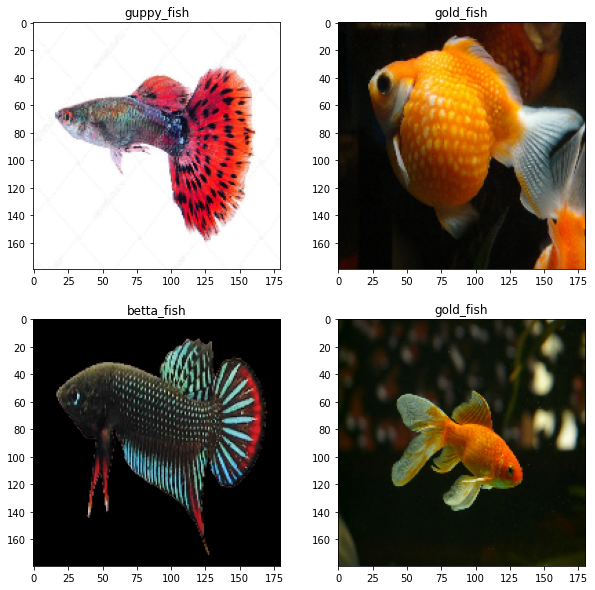

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

In [8]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [9]:
model.compile(optimizer='adam', ##Adam เป็น optimizer มีหน้าที่ที่จะช่วย compile ตัว model และยังช่วยให้โมเดลไม่หยุดการเรียนรู้ได้
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
epochs=15 ##เป็นการ train model โดยส่งข้อมูลเข้า model โดยใช้ข้อมูลใน dataset ที่เรามีอยู่จนครบทั้งหมดทุกตัวเป็นจำนวน 1 รอบ
history = model.fit(
  train_data,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


c:\python38\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


47/47 [==============================] - 10s 191ms/step - loss: 1.1924 - accuracy: 0.5561 - val_loss: 0.7891 - val_accuracy: 0.7199
Epoch 2/15
47/47 [==============================] - 9s 186ms/step - loss: 0.4707 - accuracy: 0.8102 - val_loss: 0.3331 - val_accuracy: 0.8976
Epoch 3/15
47/47 [==============================] - 9s 187ms/step - loss: 0.2576 - accuracy: 0.9171 - val_loss: 0.2304 - val_accuracy: 0.9398
Epoch 4/15
47/47 [==============================] - 9s 195ms/step - loss: 0.1105 - accuracy: 0.9599 - val_loss: 0.2193 - val_accuracy: 0.9669
Epoch 5/15
47/47 [==============================] - 9s 188ms/step - loss: 0.0328 - accuracy: 0.9920 - val_loss: 0.1989 - val_accuracy: 0.9789
Epoch 6/15
47/47 [==============================] - 9s 183ms/step - loss: 0.0195 - accuracy: 0.9973 - val_loss: 0.2667 - val_accuracy: 0.9699
Epoch 7/15
47/47 [==============================] - 10s 201ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.1558 - val_accuracy: 0.9759
Epoch 8/15
47/4

In [11]:
def predict_image(img): ##การรวบรวมข้อมูลทั้งหมดแล้วนำมาทำนายค่าที่จะได้
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

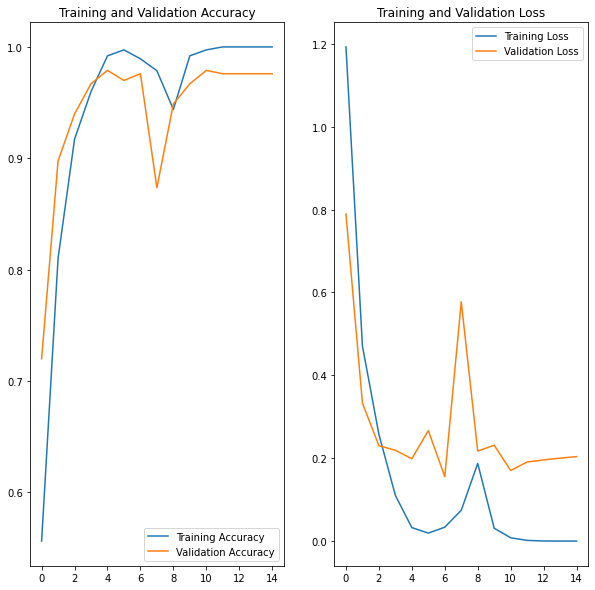

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.
